# Export Dynamics

In [1]:
#Check

In [2]:
# Import the necessary libraries
import numpy.linalg as lin
import scipy.integrate as intgr
import numpy as np
import scipy.stats as sts
import requests
import statistics
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special as spc
import os
import random
import scipy.optimize as opt
from pandas import DataFrame
from pandas import concat
import seaborn as sns
sns.set()

# 0. Data

In [3]:
#Import data
#Use unbalanced panel for wine industry (109 plants ranging from 1995 to 2007)
#wine_series = pd.read_csv('data/1_panel_vinos_desb.csv')
wine_series = pd.read_csv('data/3_wines.csv')

# Codebook
NUI: Plant identifier
ANIO: Year
INGDOM: Domestic revenues
INGEXP: Foreign revenues
IPCGeneral: Price index
TCR: Real Weighted Exchange Rate
K: Capital stock
FORPRO:
Exportador: Dummy that indicates exports in the period for the firm
CI: Intermediate inputs consumption
NUI_ANIO: Firm-Year identifier
Dolar: Dollar price in chilean pesos, nominal exchange rate
Sale: Dummy for exit
Nvals: years in the market so far
Nyear: year in the market total
Exportadores: how many exporters each year
Entraex: firm enters the export market
Salex: firm exits the export market
Perm: number of years a firm stays in the export market
Entrantesex: number of entrants for a given year
Salientesex: number of exiters for a given year
Orient: percentage of revenues made in foreign market
VA: Value added
Empieza: new firm arrives
Empezantes: entrants in a given year
Termina: firm exits
Terminantes:exiters in a given year

L: Labor
l: log of labor
k: log of capital
va: log of value added
ingdom: log of domestic rev
ingexp: log of export revenue
INGTOT: Total revenues
ingtot: log of total revenues


In [4]:
wine_series.head()

,id,rev_tot,va,rev_f,p_index,n_exch,r_exch,l_force,ln_l,rev_d,...,n_new,n_die,bug,const,quartile,iq1,iq2,iq3,iq4,eta
0,10229,591607,250791,494411,0.834965,396.78,88.89,11.25,2.420368,97196.0,...,30,1,0,1,1,1,0,0,0,5.499
1,10229,1726105,263791,1038963,1.000000,460.32,78.01,8.00,2.079442,687142.0,...,5,0,0,1,1,1,0,0,0,5.499
2,10229,1572112,632122,527352,1.033384,508.90,82.29,21.25,3.056357,1044760.0,...,2,0,0,1,1,1,0,0,0,5.499
3,10229,663447,405164,627207,1.073100,538.87,86.02,30.75,3.425890,36240.0,...,1,4,0,1,2,0,1,0,0,9.562
4,10246,5963222,2100146,934709,0.834965,396.78,88.89,99.50,4.600158,5028513.0,...,30,1,0,1,3,0,0,1,0,14.202


In [5]:
#Declare DataFrame as wine_df
wine_df = pd.DataFrame(wine_series)

In [6]:
wine_df.describe(include='all')

,id,rev_tot,va,rev_f,p_index,n_exch,r_exch,l_force,ln_l,rev_d,...,n_new,n_die,bug,const,quartile,iq1,iq2,iq3,iq4,eta
count,544.000000,5.440000e+02,5.440000e+02,5.440000e+02,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02,...,544.000000,544.000000,544.0,544.0,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000
mean,16250.996324,8.199468e+06,4.158048e+06,4.085372e+06,1.142091,547.356801,92.056415,113.285386,4.085083,4.113776e+06,...,9.036765,12.178309,0.0,1.0,2.496324,0.253676,0.246324,0.250000,0.250000,13.468062
std,5533.654604,1.260154e+07,6.691822e+06,7.228893e+06,0.134316,83.468519,7.117976,155.082169,1.141791,8.058533e+06,...,8.952634,21.311584,0.0,0.0,1.122344,0.435515,0.431266,0.433411,0.433411,7.173752
min,10229.000000,1.362790e+05,1.247000e+03,0.000000e+00,0.834965,396.780000,78.010000,3.250000,1.178655,0.000000e+00,...,1.000000,0.000000,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,5.499000
25%,12310.000000,1.042430e+06,4.983565e+05,1.308638e+05,1.033384,508.900000,86.020000,25.750000,3.248435,3.842302e+05,...,4.000000,1.000000,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,5.499000
50%,14643.000000,4.087644e+06,1.823937e+06,1.515684e+06,1.183427,530.260000,93.850000,57.625000,4.053954,1.264326e+06,...,5.000000,5.000000,0.0,1.0,2.500000,0.000000,0.000000,0.000000,0.000000,11.882000
75%,22560.000000,9.103150e+06,4.636032e+06,5.289332e+06,1.260924,609.550000,96.860000,141.687500,4.953589,4.173568e+06,...,13.000000,9.000000,0.0,1.0,3.250000,1.000000,0.000000,0.250000,0.250000,16.818750
max,40379.000000,9.740308e+07,5.405646e+07,7.992575e+07,1.316501,691.540000,104.300000,1154.250000,7.051206,6.060000e+07,...,30.000000,68.000000,0.0,1.0,4.000000,1.000000,1.000000,1.000000,1.000000,24.669000


In [7]:
#Reshape data
id = wine_series.id
year = wine_series.year
const = wine_series.const
rev_f = wine_series.rev_f
ln_rev_f = wine_series.ln_rev_f
rev_d = wine_series.rev_d
ln_rev_d = wine_series.ln_rev_d
rev_tot = wine_series.rev_tot
ln_rev_tot = wine_series.ln_rev_tot
k_stock = wine_series.k_stock
l_force = wine_series.l_force
ln_k = wine_series.ln_k
ln_l = wine_series.ln_l
inputs = wine_series.inputs
ln_inputs = wine_series.ln_inputs
p_index = wine_series.p_index
r_exch = wine_series.r_exch
exporter = wine_series.exporter
exporter_lag = wine_series.exporter_lag
id_year = wine_series.id_year
n_exch = wine_series.n_exch
out = wine_series.out
age = wine_series.age
age_tot = wine_series.age_tot
n_exporters = wine_series.n_exporters
entry = wine_series.entry
exit = wine_series.exit
perm = wine_series.perm
entrants = wine_series.entrants
exiters = wine_series.exiters
orient = wine_series.orient
ln_va = wine_series.ln_va
va = wine_series.va
arrive = wine_series.arrive
dies = wine_series.dies
n_new = wine_series.n_new
n_die = wine_series.n_die
bug = wine_series.bug
eta = wine_series.eta
iq1 = wine_series.iq1
iq2 = wine_series.iq2
iq3 = wine_series.iq3
iq4 = wine_series.iq4

# 1. Estimate parameters

In [8]:
#Initial parameters
alpha_0=1.4
beta_0=2.804
rho_0=0.4
mu_0=0
sigma_0=0.6
np.random.seed(100)

In [9]:
#Compute z and ln_r_exch
zi = ln_k*ln_l*ln_inputs
#zi = k_stock*l_force*inputs
#zi = l_force
#zi.mean()
#zi.std()
#ln_r_exch = np.log(r_exch)
print('zi mean=',zi.mean())
print('zi std=',zi.std())

zi mean= 892.6276397021309
zi std= 399.29828412278505


(array([3.71116226e-04, 3.34004603e-04, 3.71116226e-04, 4.82451094e-04,
        6.30897584e-04, 6.30897584e-04, 7.42232452e-04, 6.68009207e-04,
        7.42232452e-04, 8.90678942e-04, 6.68009207e-04, 9.64902187e-04,
        1.41024166e-03, 1.07623705e-03, 9.64902187e-04, 9.27790565e-04,
        8.16455697e-04, 1.18757192e-03, 7.79344074e-04, 4.45339471e-04,
        5.93785961e-04, 7.42232452e-04, 2.96892981e-04, 3.71116226e-04,
        4.08227848e-04, 5.19562716e-04, 3.71116226e-04, 2.96892981e-04,
        3.34004603e-04, 3.71116226e-04, 1.85558113e-04, 1.48446490e-04,
        7.42232452e-05, 3.71116226e-05, 0.00000000e+00, 3.71116226e-05,
        3.71116226e-05, 1.48446490e-04, 3.71116226e-05, 7.42232452e-05]),
 array([ 151.99654957,  201.52915327,  251.06175697,  300.59436067,
         350.12696437,  399.65956807,  449.19217178,  498.72477548,
         548.25737918,  597.78998288,  647.32258658,  696.85519028,
         746.38779398,  795.92039768,  845.45300138,  894.98560508,
      

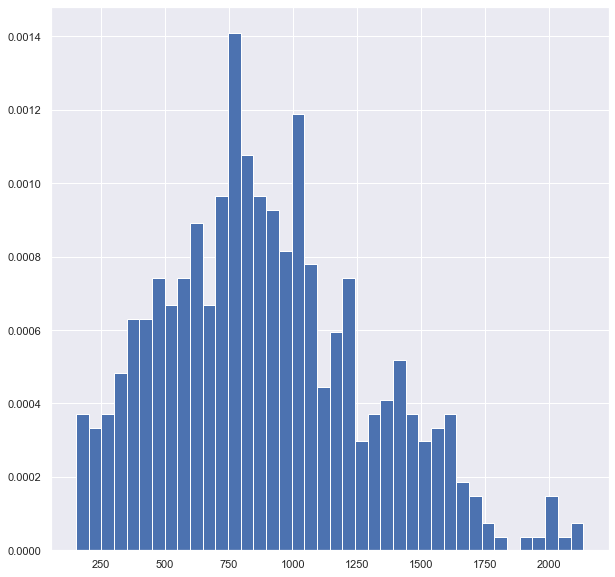

In [10]:
#Visualize zi
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist(zi, bins=40, density=True)

In [11]:
# Assumptions
e_0 = r_exch.mean()
#eta = 0.25*(5.499 + 9.562 + 14.202 + 24.669)
sp = -0.333
mu_0 = 0
z_sigma = 5
print('Assumptions:', 'e_0 =', e_0, 'sp =', sp, 'mu_0 =', mu_0, 'z_sigma =', z_sigma)

Assumptions: e_0 = 92.05641544117633 sp = -0.333 mu_0 = 0 z_sigma = 5


In [12]:
# Define LN dist
def ln_norm_pdf(xvals, mu, sigma):
    pdf_vals = ((1/(xvals * sigma * np.sqrt(2 * np.pi))) * np.exp( - (np.log(xvals) - mu)**2 / (2 * sigma**2)))
    pdf_vals[pdf_vals < 1e-10] = 1e-10
    return pdf_vals

In [13]:
# Define function that draws N x S values
def norm_draws(unif_vals, mu, sigma):
    norm_draws_vals = sts.norm.ppf(unif_vals, loc=mu, scale=sigma)
    return norm_draws_vals

In [14]:
#Priors to simulations
#Parameters of simulations
alpha_sim = 1.4
beta_sim = 2.804
mu_sim = 0
sigma_sim = 0.1
rho_sim = 0.9

In [15]:
#Simulations function
def sim_fn(alpha_s, beta_s, sigma_s, rho_s):
    
    t=544 #Size of the observation matrix to simulate
    s=10 #Number of simulations (Change to 1000 when ready)
    e_0 = 91.9240204429300
    sp_s = -0.333
    #mu_0 = 0
    #err_mu = 0
    err_sigma1 = sigma_s
    err_sigma2 = sigma_s
    err_sigma3 = sigma_s
    err_sigma4 = sigma_s
    z_mu = 150
    z_sigma = 10
    np.random.seed(100) # Set the random number seed so it gives same answers every time
    unif_vals = sts.uniform.rvs(0, 1, size=(t, s))

    #Errors simulation
    err_s1 = norm_draws(unif_vals, 0, err_sigma1)
    err_s2 = norm_draws(unif_vals, 0, err_sigma2)
    err_s3 = norm_draws(unif_vals, 0, err_sigma3)
    err_s4 = norm_draws(unif_vals, 0, err_sigma4)
    qtile1_s = 136 #0.25*t
    qtile2_s = 272 #0.5*t
    qtile3_s = 408 #0.75*t
    qtile4_s = t
    
    #eta
    eta_s = np.full((t, s), 1e-10)
    for i in range(0, qtile1_s):
        for j in range(0, s):
            eta_s[i,j] = 5.499
    for i in range(qtile1_s+1, qtile2_s):
        for j in range(0, s):
            eta_s[i,j] = 9.562
    for i in range(qtile2_s+1, qtile3_s):
        for j in range(0, s):
            eta_s[i,j] = 14.202
    for i in range(qtile3_s+1, t):
        for j in range(0, s):
            eta_s[i,j] = 24.669
            
    #e simulation
    #Compute e and e[t-1]
    e_s = np.full((t, s), 1e-10)
    elag_s = np.full((t, s), 1e-10)
    e_s[0,:] = e_0 + err_s1[0,:]
    for i in range(1, t):
        for j in range(0,s):
            elag_s[i,j] = e_s[i-1,j]
            e_s[i,j] = rho_s*(elag_s[i,j]) + (1-rho_s)*e_0 + err_s1[i,j]
            
    #z simulation
    z_draw = norm_draws(unif_vals, z_mu, z_sigma)
    #z_s = np.zeros((t, s))
    z_s = np.full((t, s), 1e-10)
    for i in range(0, t):
        for j in range(0,s):
            z_s[i,j] = z_draw[i,j]
    
    #pi f simulation
    profit_f_s = np.full((t, s), 1e-10)
    for i in range(0, t):
        for j in range(0,s):
            profit_f_s[i,j] = (z_s[i,j]**alpha_s)*(e_s[i,j]**beta_s) + err_s2[i,j]
            
    #rev_f simulation
    rev_f_s = np.full((t, s), 1e-10)
    ln_rev_f_s = np.full((t, s), 1e-10)
    for i in range(0, t):
        for j in range(0,s):
            rev_f_s[i,j] = eta_s[i,j]*profit_f_s[i,j]
            ln_rev_f_s[i,j] = np.log(rev_f_s[i,j])

    #pi d simulation
    profit_d_s = np.full((t, s), 1e-10)
    for i in range(0, t):
        for j in range(0,s):
            profit_d_s[i,j] = (z_s[i,j]**alpha_s) + err_s3[i,j]
            
    #rev_d simulation
    rev_d_s = np.full((t, s), 1e-10)
    for i in range(0, t):
        for j in range(0,s):
            rev_d_s[i,j] = eta_s[i,j]*profit_d_s[i,j]
            
    #rev_t simulation
    rev_t_s = np.full((t, s), 1e-10)
    for i in range(0, t):
        for j in range(0,s):
            rev_t_s[i,j] = rev_f_s[i,j] + rev_d_s[i,j]
            
    #inputs simulation
    inputs_s = np.full((t, s), 1e-10)
    for i in range(0, t):
        for j in range(0,s):
            inputs_s[i,j] = rev_f_s[i,j]*(1-(1/eta_s[i,j])) + rev_d_s[i,j]*(1-(1+sp_s)*(1/eta_s[i,j]))
            
    #exporter simulation
    exporter_s = np.zeros((t, s))
    for i in range(0, t):
        for j in range(0,s):
            if rev_f_s[i,j] > 0:
                exporter_s[i,j] = 1
                
    #exporter_lag simulation
    exporter_lag_s = np.zeros((t, s))
    for i in range(1, t):
        for j in range(0,s):
            exporter_lag_s[i,j] = exporter_s[i-1,j]
                
    #entry simulation
    entry_s = np.zeros((t, s))
    for i in range(0, t):
        for j in range(0,s):
            if exporter_s[i,j]==1 and exporter_lag_s[i,j]==0:
                entry_s[i,j] = 1

    #exit simulation
    exit_s = np.zeros((t, s))
    for i in range(0, t):
        for j in range(0,s):
            if exporter_s[i,j]==0 and exporter_lag_s[i,j]==1:
                exit_s[i,j] = 1
                
    #stay simulation
    perm_s = np.zeros((t, s))
    for i in range(0, t):
        for j in range(0,s):
            if exporter_s[i,j]==1 and exporter_lag_s[i,j]==1:
                perm_s[i,j] = 1
            
    
            

    return e_s, z_s, profit_f_s, ln_rev_f_s, profit_d_s, rev_d_s, rev_t_s, inputs_s, exporter_s, exporter_lag_s, entry_s, exit_s, perm_s

In [16]:
#Define the data moments
def moments_fn(e, z, rev_f, rev_t, inputs):
    
    #Moments
    if e.ndim == 1:
        m1_fn = e.mean()
        m2_fn = e.var()
        m3_fn = z.mean()
        m4_fn = (rev_f.mean()/rev_t.mean())
        m5_fn = (inputs.mean()/rev_t.mean())
        #m6_fn = 1 # sts.pearsonr((rev_f.mean()/rev_t.mean()),z.mean())[0]
    elif e.ndim == 2:
        m1_fn = statistics.mean(e.mean(axis=0))
        m2_fn = statistics.mean(e.var(axis=0))
        m3_fn = statistics.mean(z.mean(axis=0))
        #rev_f_avg = rev_f.mean(axis=1)
        #rev_t_avg = rev_t.mean(axis=1)
        #exp_int_m = (rev_f_avg/rev_t_avg)
        m4_fn = statistics.mean((rev_f/rev_t).mean(axis=0))
        #inputs_avg = inputs.mean(axis=1)
        #markup_m = (inputs_avg/rev_t_avg)
        m5_fn = statistics.mean((inputs/rev_t).mean(axis=0))
        #m6_fn = 1 #sts.pearsonr(m4_fn,m3_fn)[0]
        
    return m1_fn, m2_fn, m3_fn, m4_fn, m5_fn #, m6_fn

In [17]:
#Compute the data moments
m1_dta, m2_dta, m3_dta, m4_dta, m5_dta = moments_fn(r_exch, zi, rev_f, rev_tot, inputs)
#m1_dta, m2_dta, m3_dta, m4_dta = moments_fn(r_exch, zi, rev_f, rev_t, inputs)
dta_moms = np.array([[m1_dta], [m2_dta], [m3_dta], [m4_dta], [m5_dta]])
#dta_moms = np.array([[m1_dta], [m2_dta], [m3_dta], [m4_dta]])
print('m1_dta', m1_dta)
print('m2_dta', m2_dta)
print('m3_dta', m3_dta)
print('m4_dta', m4_dta)
print('m5_dta', m5_dta)
#print('m6_dta', m6_dta)

m1_dta 92.05641544117633
m2_dta 50.66557626171321
m3_dta 892.6276397021309
m4_dta 0.4982483507124765
m5_dta 0.6111072491094447


In [18]:
sim_fn(alpha_sim, beta_sim, sigma_sim, rho_sim)

(array([[91.934922  , 91.8652512 , 91.90498548, ..., 92.0178107 ,
         91.81449683, 91.9429561 ],
        [92.05719075, 91.79020884, 91.81736454, ..., 91.9137794 ,
         91.9155563 , 91.8810087 ],
        [92.02667001, 91.9590924 , 91.91867446, ..., 91.84811612,
         91.99902548, 91.66896924],
        ...,
        [91.89911162, 92.12742671, 91.57155749, ..., 92.21484736,
         92.0782626 , 91.94574848],
        [92.02038476, 92.00040305, 91.51151034, ..., 92.26889659,
         91.90856701, 91.84115566],
        [92.09920774, 92.10681909, 91.61745376, ..., 92.20096058,
         91.95466354, 91.93212009]]),
 array([[151.09015601, 144.12307589, 148.09650391, ..., 159.37902555,
         139.04763821, 151.89356595],
        [162.33589007, 141.9080718 , 141.04755571, ..., 140.53477252,
         159.01071128, 143.99461625],
        [148.27962906, 165.5502397 , 159.06443339, ..., 143.33126136,
         158.2622762 , 128.36593688],
        ...,
        [144.134333  , 149.21706858,

In [19]:
print('mean=',rev_f.mean())
print('std=',rev_f.std())
print('mean=',inputs.mean())
print('std=',inputs.std())

mean= 4085371.564338235
std= 7228892.929050994
mean= 5010754.525735294
std= 7090669.85337125


In [20]:
#Compute the model moments prior
e_sim1, z_sim1, profit_f_sim1, rev_f_sim1, profit_d_sim1, rev_d_sim1, rev_t_sim1, inputs_sim1, exporter_sim1, exporter_lag_sim1, entry_sim1, exit_sim1, perm_sim1 = sim_fn(alpha_sim, beta_sim, sigma_sim, rho_sim)
m1_mom, m2_mom, m3_mom, m4_mom, m5_mom = moments_fn(e_sim1, z_sim1, rev_f_sim1, rev_t_sim1, inputs_sim1)
#m1_mom, m2_mom, m3_mom, m4_mom = moments_fn(e_sim1, z_sim1, rev_f_sim1)
mod_moms = np.array([[m1_mom], [m2_mom], [m3_mom], [m4_mom], [m5_mom]])
#mod_moms = np.array([[m1_mom], [m2_mom], [m3_mom], [m4_mom]])
print('m1_mom', m1_mom)
print('m2_mom', m2_mom)
print('m3_mom', m3_mom)
print('m4_mom', m4_mom)
print('m5_mom', m5_mom)

m1_mom 91.91418118436027
m2_mom 0.049590026447922105
m3_mom 149.91865225764656
m4_mom -0.5166104980260966
m5_mom -55147000.57099241


In [21]:
#Error vector
def err_vec(sim_vals, simple):
    #e_sim, z_sim, rev_f_sim, rev_t_sim, inputs_sim = sim_vals
    e_sim, z_sim, profit_f_sim, rev_f_sim, profit_d_sim, rev_d_sim, rev_t_sim, inputs_sim, exporter_sim, exporter_lag_sim, entry_sim, exit_sim, perm_sim = sim_vals
    
    #Data moments
    m1_dta, m2_dta, m3_dta, m4_dta, m5_dta = moments_fn(r_exch, zi, rev_f, rev_tot, inputs)
    moms_data = np.array([[m1_dta], [m2_dta], [m3_dta], [m4_dta], [m5_dta]])
    #m1_dta, m2_dta, m3_dta, m4_dta = moments_fn(r_exch, zi, rev_f)
    #moms_data = np.array([[m1_dta], [m2_dta], [m3_dta], [m4_dta]])
    
    #Model moments
    m1_mom, m2_mom, m3_mom, m4_mom, m5_mom = moments_fn(e_sim, z_sim, rev_f_sim, rev_t_sim, inputs_sim)
    moms_sim = np.array([[m1_mom], [m2_mom], [m3_mom], [m4_mom], [m5_mom]])
    #m1_mom, m2_mom, m3_mom, m4_mom = moments_fn(e_sim, z_sim, rev_f_sim)
    #moms_sim = np.array([[m1_mom], [m2_mom], [m3_mom], [m4_mom]])

    #Err vec
    if simple:
        err_vec = moms_sim - moms_data
    else:
        err_vec = (moms_sim - moms_data) / moms_data
    
    return err_vec

In [22]:
#Criterion function
def criterion(params, *args):
    alpha, beta, sigma, rho = params
    sim_vals, W_hat = args
    sim_vals = sim_fn(alpha, beta, sigma, rho)
    err = err_vec(sim_vals, simple=True)
    crit_val = err.T @ W_hat @ err 
    return crit_val

In [23]:
#Estimate by SMM
#Initial parameters
alpha_init = 1.4 #alpha_sim
beta_init = 2.804 #beta_sim
sigma_init = 1.1 #sigma_sim
rho_init = 0.7 #rho_sim
params_init = np.array([alpha_init, beta_init, sigma_init, rho_init])
W_hat = np.eye(5)
#W_hat = np.eye(4)
sim_init = sim_fn(alpha_init, beta_init, sigma_init, rho_init)

smm_args = (sim_init, W_hat)

#results = opt.minimize(criterion, params_init, args=(smm_args), method='TNC')
results = opt.minimize(criterion, params_init, args=(smm_args), method='TNC',
                       bounds=((0.01-(1e-10), 4.99+(1e-10)), (0.01-(1e-10), 4.99+(1e-10)), (1-(1e-10), 4.9+(1e-10)),
                               (-0.99-(1e-10), 0.99+(1e-10))))
#results = opt.minimize(criterion, params_init, args=(smm_args), method='L-BFGS-B', bounds=((1e-10, 1-(1e-10)), (5+(1e-10), 14-(1e-10)), (1e-10, 1.1-(1e-10)), (-1+(1e-10), 1-(1e-10))))
alpha_smm, beta_smm, sigma_smm, rho_smm = results.x
print('alpha_smm=', alpha_smm, 'beta_smm=', beta_smm, 'sigma_smm=', sigma_smm, 'rho_smm=', rho_smm)

C:\Users\joset\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\joset\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1976: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)


alpha_smm= 4.9900000001 beta_smm= 0.0099999999 sigma_smm= 4.9000000001 rho_smm= 0.46223519230274573


In [188]:
#Check convergence
results

     fun: array([[2.13145861e+15]])
     jac: array([ 0.00000000e+00,  1.87055172e+15, -2.28050000e+11, -7.10912250e+13])
 message: 'Max. number of function evaluations reached'
    nfev: 100
     nit: 12
  status: 3
 success: False
       x: array([4.99      , 0.01      , 3.69761041, 0.99      ])

In [768]:
#Criterion function value
print("crit_val ", results.fun)

crit_val  [[2076.14613471]]


In [770]:
#Compute the model moments post
e_smm1, z_smm1, rev_f_smm1 = sim_fn(alpha_smm, beta_smm, sigma_smm, rho_smm)
#m1_smm1, m2_smm1, m3_smm1, m4_smm1, m5_smm1 = moments_fn(e_smm1, z_smm1, rev_f_smm1)
m1_smm1, m2_smm1, m3_smm1, m4_smm1 = moments_fn(e_smm1, z_smm1, rev_f_smm1)
#smm1_moms = np.array([[m1_smm1], [m2_smm1], [m3_smm1], [m4_smm1], [m5_smm1]])
smm1_moms = np.array([[m1_smm1], [m2_smm1], [m3_smm1], [m4_smm1]])
print('m1_smm1', m1_smm1)
print('m2_smm1', m2_smm1)
print('m3_smm1', m3_smm1)
print('m4_smm1', m4_smm1)
#print('m5_smm1', m5_smm1)

m1_smm1 91.92177598101917
m2_smm1 2.372084127733348
m3_smm1 5059730.293276324
m4_smm1 0.9400969708951383


In [771]:
#Jacobian matrix
def jac_err(alpha, beta, sigma, rho, simple=True):
    '''
    This function computes the Jacobian matrix of partial derivatives of the R x 1 moment
    error vector e(x|theta) with respect to the K parameters theta_i in the K x 1 parameter vector
    theta. The resulting matrix is R x K Jacobian.
    '''
    jac_err_mat = np.zeros((4, 4))
    h_alpha = 1e-4 * alpha
    h_beta = 1e-4 * beta
    h_sigma = 1e-4 * sigma
    h_rho = 1e-4 * rho

    jac_err_mat[:, 0] = \
        ((err_vec(sim_fn(alpha + h_alpha, beta, sigma, rho), simple) -
          err_vec(sim_fn(alpha - h_alpha, beta, sigma, rho), simple)) / (2 * h_alpha)).flatten()
    jac_err_mat[:, 1] = \
        ((err_vec(sim_fn(alpha, beta + h_beta, sigma, rho), simple) -
          err_vec(sim_fn(alpha, beta - h_beta, sigma, rho), simple)) / (2 * h_beta)).flatten()  
    jac_err_mat[:, 2] = \
        ((err_vec(sim_fn(alpha, beta, sigma + h_sigma, rho), simple) -
          err_vec(sim_fn(alpha, beta, sigma - h_sigma, rho), simple)) / (2 * h_sigma)).flatten()
    jac_err_mat[:, 3] = \
        ((err_vec(sim_fn(alpha, beta, sigma, rho + h_rho), simple) -
          err_vec(sim_fn(alpha, beta, sigma, rho - h_rho), simple)) / (2 * h_rho)).flatten()


    return jac_err_mat

In [778]:
#Std error calculation
S = 100
par = 4
d_err = jac_err(alpha_smm, beta_smm, sigma_smm, rho_smm, False)
print("d_err", d_err)
print("Weight matrix", W_hat)
SigHat = (1 / S**par) * lin.inv(d_err.T @ W_hat @ d_err)
print("SigHat", SigHat)
print('Std. err. alpha_hat=', np.sqrt(SigHat[0, 0]))
print('Std. err. beta_hat=', np.sqrt(SigHat[1, 1]))
print('Std. err. sigma_hat=', np.sqrt(SigHat[2, 2]))
print('Std. err. rho_hat=', np.sqrt(SigHat[3, 3]))

d_err [[ 0.00000000e+00  0.00000000e+00 -2.21021486e-05 -1.32499905e-04]
 [ 0.00000000e+00  0.00000000e+00  9.00892220e-02  1.33677695e-01]
 [ 5.01297425e+00  4.52192001e+00  1.57530849e-03  6.56630014e-04]
 [ 2.09935468e-01 -6.51310869e-02 -1.25590580e-01 -5.99963179e-01]]
Weight matrix [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
SigHat [[ 2.16209973 -2.396343   -2.18832561  1.47477532]
 [-2.396343    2.65596433  2.42541021 -1.63455342]
 [-2.18832561  2.42541021  2.21487233 -1.49266471]
 [ 1.47477532 -1.63455342 -1.49266471  1.00594926]]
Std. err. alpha_hat= 1.470408013697766
Std. err. beta_hat= 1.6297129601585456
Std. err. sigma_hat= 1.4882447154539713
Std. err. rho_hat= 1.002970216908962
